In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Efecto fotoeléctrico en función de la intensidad

In [27]:
data2 = pd.read_excel("C:/Users/manto/OneDrive/Escritorio/datos_fotoelectrico_voltaje_vs_corriente.xlsx")
data2

,Corriente (nA),Voltaje (rotación 1),Voltaje (rotación 2),Voltaje (rotación 3),Voltaje (rotación 4)
0,100,0.165,0.060,0.207,0.223
1,90,0.213,0.100,0.249,0.256
2,80,0.229,0.136,0.259,0.268
3,70,0.243,0.158,0.272,0.278
4,60,0.253,0.175,0.283,0.287
5,50,0.266,0.197,0.294,0.298
6,40,0.282,0.220,0.306,0.310
7,30,0.300,0.246,0.322,0.324
8,20,0.323,0.275,0.341,0.340
9,10,0.346,0.308,0.361,0.356


In [28]:
columnas_voltaje = [col for col in data2.columns if "Voltaje" in col]

data2[columnas_voltaje] = data2[columnas_voltaje] * -1

corriente = data2["Corriente (nA)"]

error_voltaje = 0.001  
error_corriente = 0.25



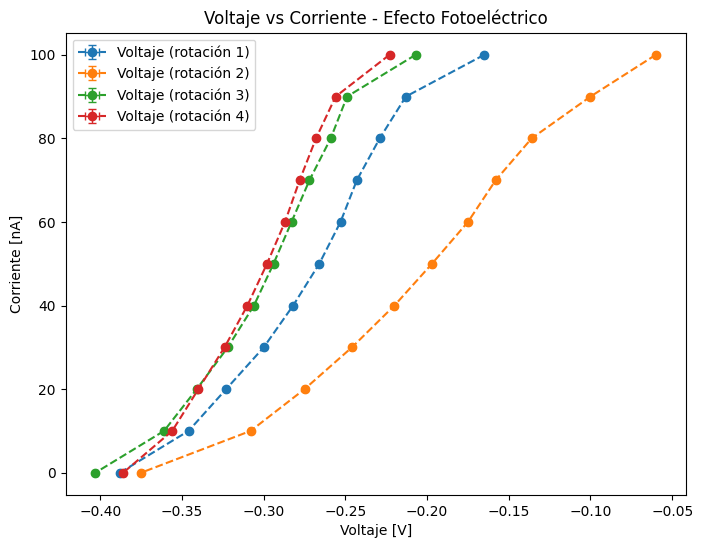

In [29]:
plt.figure(figsize=(8, 6))
for col in columnas_voltaje:
    plt.errorbar(
        data2[col], corriente,
        xerr=error_voltaje, yerr=error_corriente,
        fmt="o", linestyle="--", capsize=3, elinewidth=1,
        label=col
    )

plt.xlabel("Voltaje [V]")
plt.ylabel("Corriente [nA]")
plt.title("Voltaje vs Corriente - Efecto Fotoeléctrico")
plt.legend()
#plt.grid(True, linestyle=":")
plt.show()


# Efecto fotoeléctrico en función de la frecuencia

In [30]:
data1 = pd.read_excel("C:/Users/manto/OneDrive/Escritorio/datos_jorge.xlsx")
data1

,corriente (nA),voltaje (rojo),voltaje (verde),voltaje (amarillo),voltaje (azul)
0,100,0.07,0.579,0.151,0.551
1,90,0.14,0.591,0.225,0.558
2,80,0.16,0.597,0.253,0.560
3,70,0.18,0.600,0.273,0.562
4,60,0.19,0.603,0.291,0.564
5,50,0.21,0.606,0.310,0.566
6,40,0.23,0.610,0.337,0.568
7,30,0.25,0.613,0.366,0.570
8,20,0.28,0.617,0.401,0.571
9,10,0.32,0.621,0.445,0.573


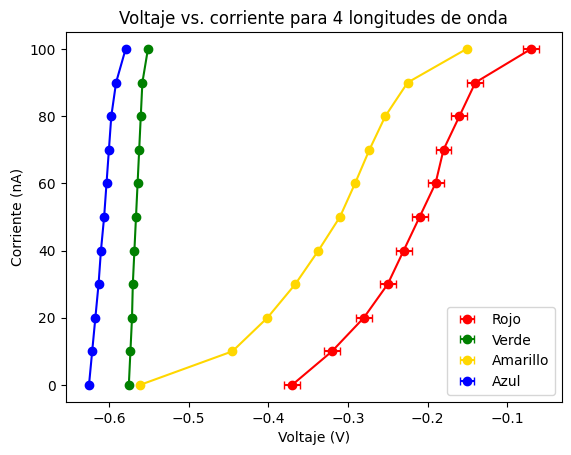

In [31]:
corriente = data1["corriente (nA)"]
v_rojo = -1 * data1["voltaje (rojo)"]
v_azul = -1 * data1["voltaje (verde)"]
v_amarillo = -1 * data1["voltaje (amarillo)"]
v_verde = -1 * data1["voltaje (azul)"]


err_rojo = [0.01] * len(v_rojo)
err_otros = [0.001] * len(v_rojo)


plt.errorbar(v_rojo, corriente, xerr=err_rojo, fmt='o', color="red", label="Rojo", capsize=3)
plt.plot(v_rojo, corriente, color="red")

plt.errorbar(v_verde, corriente, xerr=err_otros, fmt='o', color="green", label="Verde", capsize=3)
plt.plot(v_verde, corriente, color="green")

plt.errorbar(v_amarillo, corriente, xerr=err_otros, fmt='o', color="gold", label="Amarillo", capsize=3)
plt.plot(v_amarillo, corriente, color="gold")

plt.errorbar(v_azul, corriente, xerr=err_otros, fmt='o', color="blue", label="Azul", capsize=3)
plt.plot(v_azul, corriente, color="blue")

plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (nA)")
plt.title("Voltaje vs. corriente para 4 longitudes de onda")
plt.legend()
plt.show()


In [32]:
# Cálculo de frecuencia
colores = {"Rojo": 659e-9, "Verde": 567e-9, "Amarillo": 590e-9, "Azul": 469e-9}

frec = []
error_frec = []
print("Frecuencias en Hz:")
for i in colores:
    print(i, 3e8 / colores[i])
    frec.append(3e8 / colores[i])



# Errores frecuencia
def derivada(long_onda, c=3e8, error_long_onda=12.7e-9):
    return np.abs((c / long_onda**2) * error_long_onda)

print("\nError de propagación de la frecuencia en Hz")
for i in colores:
    print(i, derivada(colores[i]))
    error_frec.append(derivada(colores[i]))

Frecuencias en Hz:
Rojo 455235204855842.2
Verde 529100529100529.06
Amarillo 508474576271186.5
Azul 639658848614072.5

Error de propagación de la frecuencia en Hz
Rojo 8773121550332.62
Verde 11851105325532.13
Amarillo 10945130709566.217
Azul 17321252403835.229


In [33]:
# Cálculo de la energía cinética máxima

data1["corriente (nA)"][0]

def energia_cinetica(voltaje, e = 1.602e-19):
    # esta función es para tomar la energía en J. Si se desea trabajar en eV solo se debe tomar el voltaje de frenado en unidades de eV
    return e*np.abs(voltaje)

ultima_fila = data1.iloc[-1]
voltajes = ultima_fila.filter(like="voltaje")
print("Voltajes de frenado en V")
print(voltajes)
print("\nEnergías cinéticas máximas en J")
for nombre, valor in voltajes.items():
    print(f"{nombre}: {energia_cinetica(valor):.3e} J")


# Error energías cinéticas
def error_energia_cinetica(voltaje, e = 1.602e-19):
    return (e*0.001)

error_k = []
for i in voltajes:
    error_k.append(error_energia_cinetica(i))


Voltajes de frenado en V
voltaje (rojo)        0.370
voltaje (verde)       0.625
voltaje (amarillo)    0.561
voltaje (azul)        0.575
Name: 10, dtype: float64

Energías cinéticas máximas en J
voltaje (rojo): 5.927e-20 J
voltaje (verde): 1.001e-19 J
voltaje (amarillo): 8.987e-20 J
voltaje (azul): 9.211e-20 J


[455235204855842.2, 529100529100529.06, 508474576271186.5, 639658848614072.5]
[np.float64(5.9274e-20), np.float64(1.00125e-19), np.float64(8.98722e-20), np.float64(9.2115e-20)]
-------------------
[np.float64(8773121550332.62), np.float64(11851105325532.13), np.float64(10945130709566.217), np.float64(17321252403835.229)]
[1.602e-22, 1.602e-22, 1.602e-22, 1.602e-22]


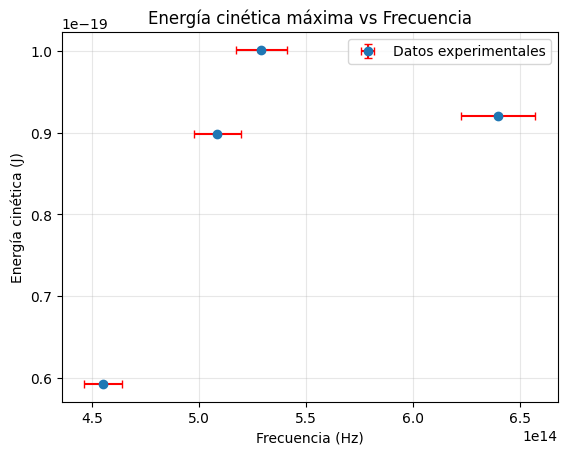

In [36]:
# Gráfica K_max vs. frecuencia
k = []
for nombre, valor in voltajes.items():
    K = energia_cinetica(valor)
    k.append(K)



print(frec)
print(k)
print("-------------------")
print(error_frec)
print(error_k)

plt.errorbar(frec, k, xerr=error_frec, yerr=error_k, fmt='o', 
             ecolor='red', capsize=3, label="Datos experimentales")

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Energía cinética (J)")
plt.title("Energía cinética máxima vs Frecuencia")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

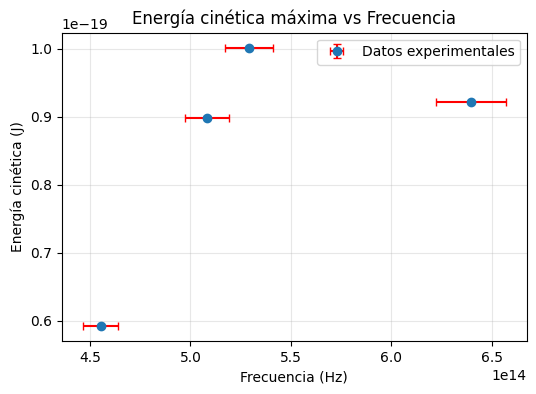

In [37]:
plt.figure(figsize=(6,4))
plt.errorbar(frec, k, xerr=error_frec, yerr=error_k, fmt='o',
             ecolor='red', capsize=3, label="Datos experimentales")

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Energía cinética (J)")
plt.title("Energía cinética máxima vs Frecuencia")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [38]:
tabla = pd.DataFrame({
    "Frecuencia (Hz)": frec,
    "Error Frecuencia (Hz)": error_frec,
    "Energía cinética (J)": k,
    "Error Energía (J)": error_k
})

In [39]:
tabla

,Frecuencia (Hz),Error Frecuencia (Hz),Energía cinética (J),Error Energía (J)
0,4.552352e+14,8.773122e+12,5.927400e-20,1.602000e-22
1,5.291005e+14,1.185111e+13,1.001250e-19,1.602000e-22
2,5.084746e+14,1.094513e+13,8.987220e-20,1.602000e-22
3,6.396588e+14,1.732125e+13,9.211500e-20,1.602000e-22


In [15]:
#-----------------------------------------------------------------------------

In [41]:
x = tabla["Frecuencia (Hz)"].values
y = tabla["Energía cinética (J)"].values

coef, cov = np.polyfit(x, y, 1, cov=True)
pendiente, intercepto = coef
error_pendiente, error_intercepto = np.sqrt(np.diag(cov))

print(f"Pendiente (h): {pendiente:.4e} ± {error_pendiente:.4e} J*s")
print(f"Intercepto (-phi): {intercepto:.4e} ± {error_intercepto:.4e} J")


Pendiente (h): 1.4306e-34 ± 1.2845e-34 J*s
Intercepto (-phi): 9.0788e-21 ± 6.9018e-20 J


Pendiente (h): 1.4306e-34 ± 1.1927e-36 J*s
Intercepto (-phi): 9.0788e-21 ± 6.4089e-22 J


<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
C:\Users\manto\AppData\Local\Temp\ipykernel_16664\3347146711.py:34: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_fit, y_fit, 'r-', lw=2, label=f'Ajuste lineal\n$y = ({m:.2e} \pm {dm:.1e})x + ({b:.1e} \pm {db:.1e})$')
C:\Users\manto\AppData\Local\Temp\ipykernel_16664\3347146711.py:34: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_fit, y_fit, 'r-', lw=2, label=f'Ajuste lineal\n$y = ({m:.2e} \pm {dm:.1e})x + ({b:.1e} \pm {db:.1e})$')


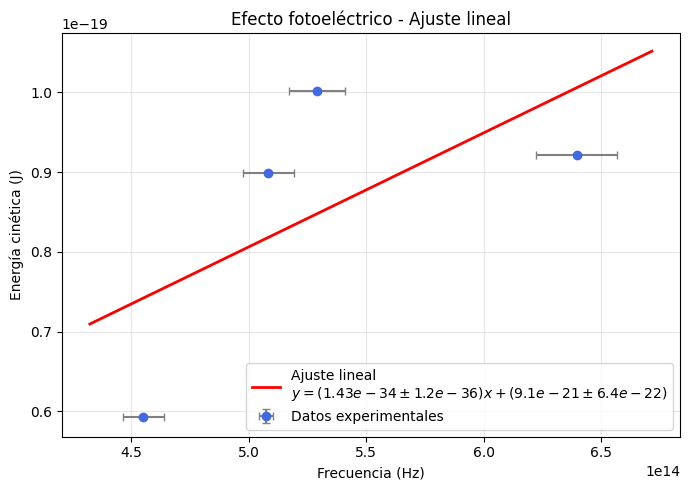

[1.602e-22 1.602e-22 1.602e-22 1.602e-22]


In [49]:
from scipy.optimize import curve_fit

def recta(f, m, b):
    return m*f + b

x = tabla["Frecuencia (Hz)"].values
y = tabla["Energía cinética (J)"].values
yerr = tabla["Error Energía (J)"].values


popt, pcov = curve_fit(recta, x, y, sigma=yerr, absolute_sigma=True)
m, b = popt
dm, db = np.sqrt(np.diag(pcov))

print(f"Pendiente (h): {m:.4e} ± {dm:.4e} J*s")
print(f"Intercepto (-phi): {b:.4e} ± {db:.4e} J")


x = tabla["Frecuencia (Hz)"].values
y = tabla["Energía cinética (J)"].values
xerr = tabla["Error Frecuencia (Hz)"].values
yerr = tabla["Error Energía (J)"].values


x_fit = np.linspace(min(x)*0.95, max(x)*1.05, 200)
y_fit = recta(x_fit, m, b)


plt.figure(figsize=(7,5))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color='royalblue',
             ecolor='gray', capsize=3, label='Datos experimentales')


plt.plot(x_fit, y_fit, 'r-', lw=2, label=f'Ajuste lineal\n$y = ({m:.2e} \pm {dm:.1e})x + ({b:.1e} \pm {db:.1e})$')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Energía cinética (J)")
plt.title("Efecto fotoeléctrico - Ajuste lineal")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print(yerr)


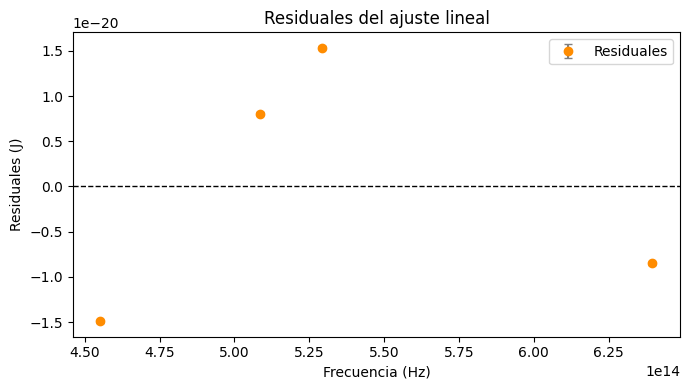

In [ ]:
# residuales
y_pred = recta(x, m, b)
residuales = y - y_pred

plt.figure(figsize=(7,4))
plt.errorbar(x, residuales, yerr=yerr, fmt='o', color='darkorange',
             ecolor='gray', capsize=3, label='Residuales')

plt.axhline(0, color='black', lw=1, ls='--') 
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Residuales (J)")
plt.title("Residuales del ajuste lineal")
plt.legend()

plt.tight_layout()
plt.show()
